In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import os
import zipfile

import datetime
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

**Continue from here**

In [2]:
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/coconut dataset/train',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/coconut dataset/valid',
    target_size = (256,256),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 2301 images belonging to 3 classes.
Found 531 images belonging to 3 classes.


In [3]:
from tensorflow.keras.regularizers import l2

In [4]:
cnn = Sequential()

In [5]:
cnn.add(layers.Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu')),
cnn.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(1, 1), name='block1_pool'))
cnn.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(1, 1), name='block2_pool'))
cnn.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv3'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
cnn.add(layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv4'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
cnn.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
cnn.add(layers.Flatten())


In [6]:
cnn.add(Dense(3,kernel_regularizer =tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 255, 255, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block2_pool (MaxPooling2D)  (None, 254, 254, 64)      0         
                                                                 
 block1_conv3 (Conv2D)       (None, 254, 254, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 253, 253, 64)     0

In [8]:
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])
#r=cnn.fit(x=train_gen,epochs=10)


In [9]:
r=cnn.fit(x=train_gen,steps_per_epoch=10,epochs=10,validation_data=(val_gen))

Epoch 1/10
10/10 [==============================] - 501s 53s/step - loss: 1.5386 - accuracy: 0.3000 - val_loss: 1.7364 - val_accuracy: 0.2467
Epoch 2/10
10/10 [==============================] - 199s 21s/step - loss: 1.5231 - accuracy: 0.3375 - val_loss: 1.3982 - val_accuracy: 0.2467
Epoch 3/10
10/10 [==============================] - 194s 21s/step - loss: 1.2495 - accuracy: 0.3375 - val_loss: 1.2373 - val_accuracy: 0.2467
Epoch 4/10
10/10 [==============================] - 188s 20s/step - loss: 1.1773 - accuracy: 0.3187 - val_loss: 1.1199 - val_accuracy: 0.3766
Epoch 5/10
10/10 [==============================] - 179s 19s/step - loss: 1.1567 - accuracy: 0.3187 - val_loss: 1.1905 - val_accuracy: 0.3766
Epoch 6/10
10/10 [==============================] - 177s 19s/step - loss: 1.3451 - accuracy: 0.3250 - val_loss: 1.3956 - val_accuracy: 0.3766
Epoch 7/10
10/10 [==============================] - 171s 18s/step - loss: 1.4008 - accuracy: 0.3375 - val_loss: 1.3181 - val_accuracy: 0.3766
Epoch 

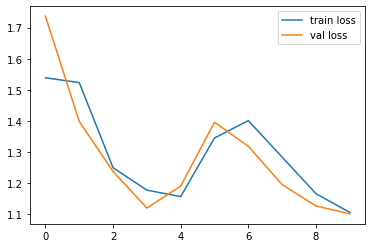

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as pyplot
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

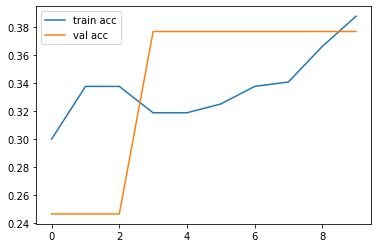

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
cnn.save('havish.h5')